# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Setting biar gambar grafiknya tajam dan bagus
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 1. Load Data Telco Churn (>7000 baris)
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Sedikit perbaikan tipe data biar grafiknya jalan (TotalCharges aslinya teks, kita ubah jadi angka)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print("Data Berhasil Diload!")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
df.head()

Data Berhasil Diload!
Jumlah Baris: 7043
Jumlah Kolom: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

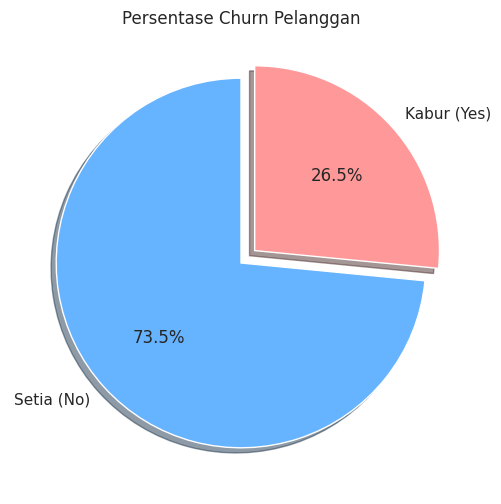

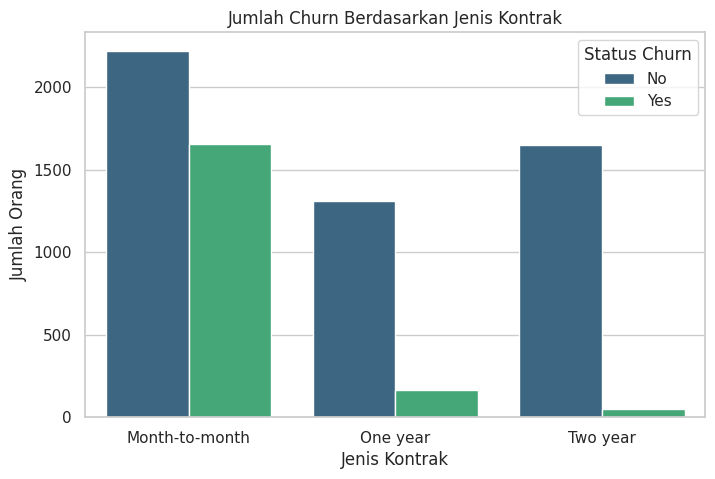

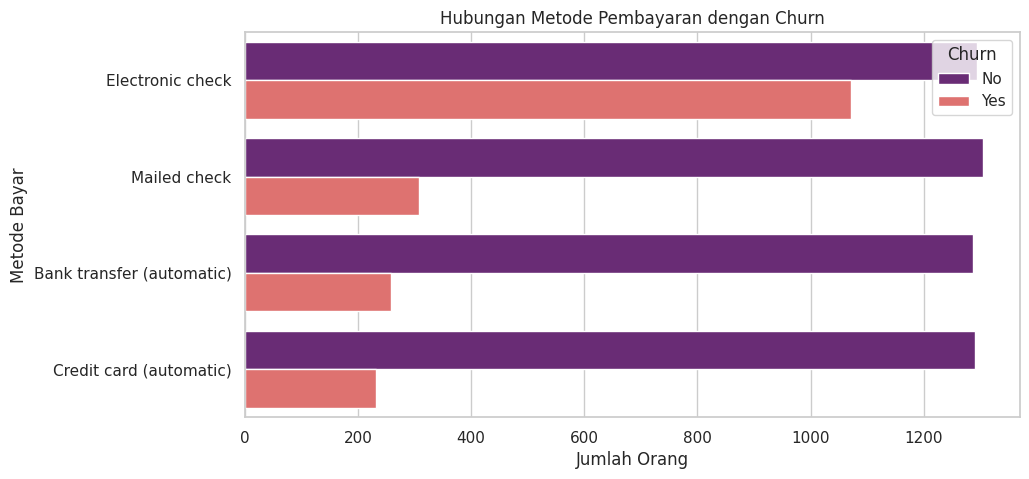

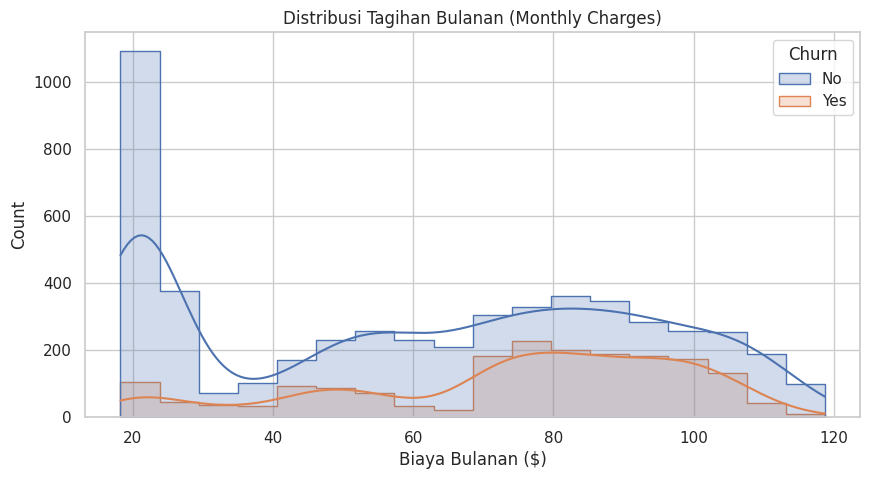

/tmp/ipython-input-2261552399.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')


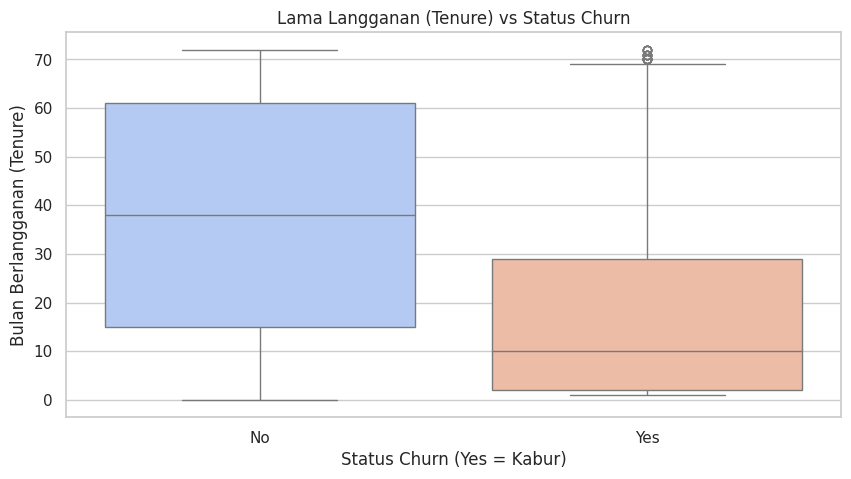

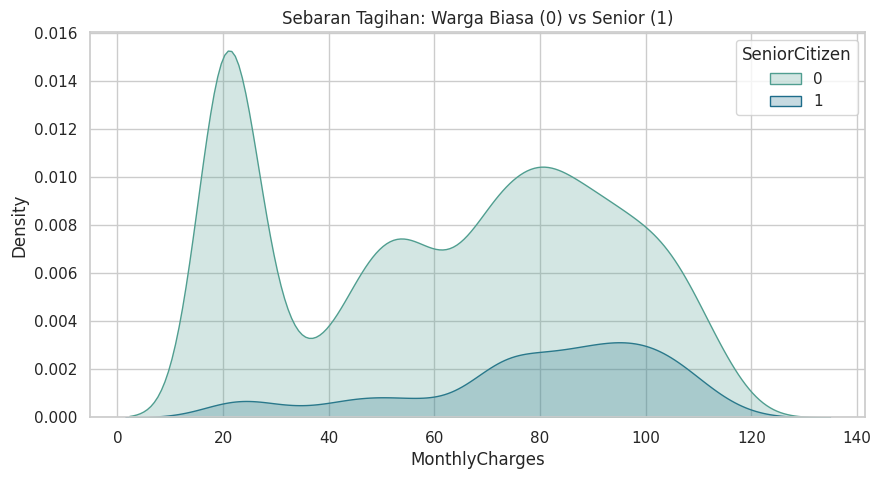

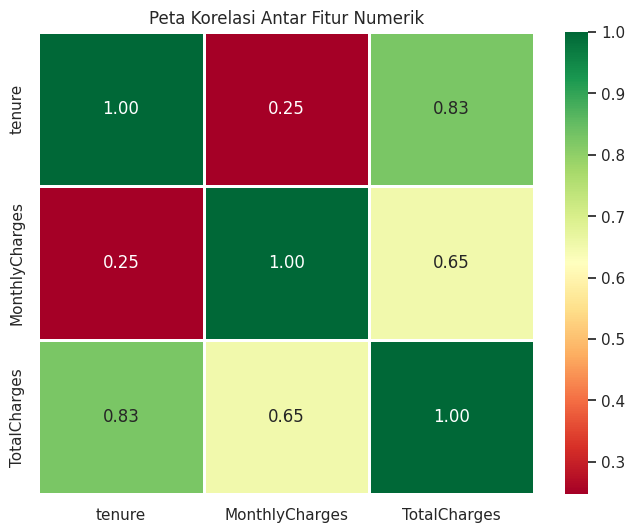

In [3]:
# --- Grafik 1: Pie Chart (Persentase Pelanggan Kabur) ---
plt.figure(figsize=(6, 6))
explode = (0, 0.1)  # Biar potongan pie-nya agak keluar sedikit
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'],
                                    explode=explode, startangle=90, labels=['Setia (No)', 'Kabur (Yes)'], shadow=True)
plt.title('Persentase Churn Pelanggan')
plt.ylabel('')
plt.show()

# --- Grafik 2: Bar Chart (Pengaruh Jenis Kontrak) ---
# Menunjukkan kalau kontrak bulanan (Month-to-month) paling banyak kabur
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Jumlah Churn Berdasarkan Jenis Kontrak')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Orang')
plt.legend(title='Status Churn')
plt.show()

# --- Grafik 3: Bar Chart (Metode Pembayaran) ---
# Menunjukkan pengguna Electronic Check paling rawan kabur
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='PaymentMethod', hue='Churn', palette='magma')
plt.title('Hubungan Metode Pembayaran dengan Churn')
plt.xlabel('Jumlah Orang')
plt.ylabel('Metode Bayar')
plt.show()

# --- Grafik 4: Histogram (Sebaran Tagihan Bulanan) ---
# Melihat apakah yang tagihannya mahal lebih sering kabur?
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, element="step")
plt.title('Distribusi Tagihan Bulanan (Monthly Charges)')
plt.xlabel('Biaya Bulanan ($)')
plt.show()

# --- Grafik 5: Boxplot (Lama Langganan) ---
# Membuktikan pelanggan baru (tenure rendah) lebih mudah kabur
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title('Lama Langganan (Tenure) vs Status Churn')
plt.xlabel('Status Churn (Yes = Kabur)')
plt.ylabel('Bulan Berlangganan (Tenure)')
plt.show()

# --- Grafik 6: KDE Plot (Senior Citizen / Lansia) ---
# Membandingkan sebaran tagihan antara warga biasa vs lansia
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='MonthlyCharges', hue='SeniorCitizen', fill=True, palette='crest')
plt.title('Sebaran Tagihan: Warga Biasa (0) vs Senior (1)')
plt.show()

# --- Grafik 7: Heatmap Korelasi (Hubungan Angka) ---
# Grafik kotak-kotak warna-warni ala data scientist pro
plt.figure(figsize=(8, 6))
# Ambil cuma kolom angka
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=1)
plt.title('Peta Korelasi Antar Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# 1. Hapus kolom ID (Gak guna)
if 'customerID' in df.columns:
    df = df.drop(['customerID'], axis=1)

# 2. Encoding (Ubah Teks jadi Angka)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Loop otomatis: Kalau kolomnya huruf, ubah jadi angka
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# 3. Normalisasi (Agar angka besar dikecilkan ke skala 0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Data sudah bersih dan siap dilatih!")
df.head()

Data sudah bersih dan siap dilatih!


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1


In [5]:
from sklearn.model_selection import train_test_split

# Pisahkan Fitur (X) dan Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Bagi data: 80% Latih, 20% Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat folder
output_folder = "telco_preprocessing"
os.makedirs(output_folder, exist_ok=True)

# Simpan CSV
X_train.to_csv(os.path.join(output_folder, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(output_folder, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(output_folder, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(output_folder, "y_test.csv"), index=False)

print(f"Data tersimpan di folder: {output_folder}")

Data tersimpan di folder: telco_preprocessing
